-----------------------------------------------Document Classification----------------------------------------------------------

In [41]:
# Loading the Required libraries/packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import pickle
import requests
import json

In [42]:
# Setting up the working directory

import os;
path="C:\\Users\\shrut\\OneDrive - University of South Florida\\BAIS- Sem 4 Fall 2018\\HeavyWater"
os.getcwd()

'C:\\Users\\ShReddy\\OneDrive - Ashley Furniture Industries, Inc\\TEXT ANALYTICS Project\\HeavyWater'

In [43]:
# Load the data into a dataframe
data=pd.read_csv("shuffled-full-set-hashed.csv", header=None)

In [44]:
print(data.shape)
data.head()

(62204, 2)


,0,1
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...


In [45]:
df=pd.DataFrame(data.values, columns=['Label', 'Text']) #naming the columns

In [46]:
#Basic viewing the dataframe

print(df.shape)
print(df.describe())
df.head()

(62204, 2)
        Label                                               Text
count   62204                                              62159
unique     14                                              60176
top      BILL  bf064c332aa1 079935e500e5 1a4dd36c6de0 7efa289...
freq    18968                                                 11


,Label,Text
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...


In [47]:
#Remove duplicates 

df=df.drop_duplicates(keep='first')
print(df.shape)# to check the shape of the dataset after dropping duplicate values

print(df.isnull().sum()) # to check for null values

# We observe that 1656 duplicates were found and removed.

(60548, 2)
Label    0
Text     6
dtype: int64


In [48]:
df=df.dropna()# To remove the rows with null values in Text column.

# Final dataset structure after cleaning
print(df.shape)
print(df.describe())

# 6 rows have been removed.

(60542, 2)
        Label          Text
count   60542         60542
unique     14         60176
top      BILL  84884d80641d
freq    18449             3


------------------------------------------------EXPLORATORY DATA ANALYSIS-------------------------------------------------------

In [49]:
#---------Calulating the count for each Label----------

df_count=df['Label'].value_counts().reset_index().rename(columns={'index':'Label', 'Label':'Number_of_Documents'})
df_count

,Label,Number_of_Documents
0,BILL,18449
1,POLICY CHANGE,10229
2,CANCELLATION NOTICE,9571
3,BINDER,8590
4,DELETION OF INTEREST,4779
5,REINSTATEMENT NOTICE,4295
6,DECLARATION,966
7,CHANGE ENDORSEMENT,866
8,RETURNED CHECK,730
9,EXPIRATION NOTICE,719


Text(0.5,0,'Labels')

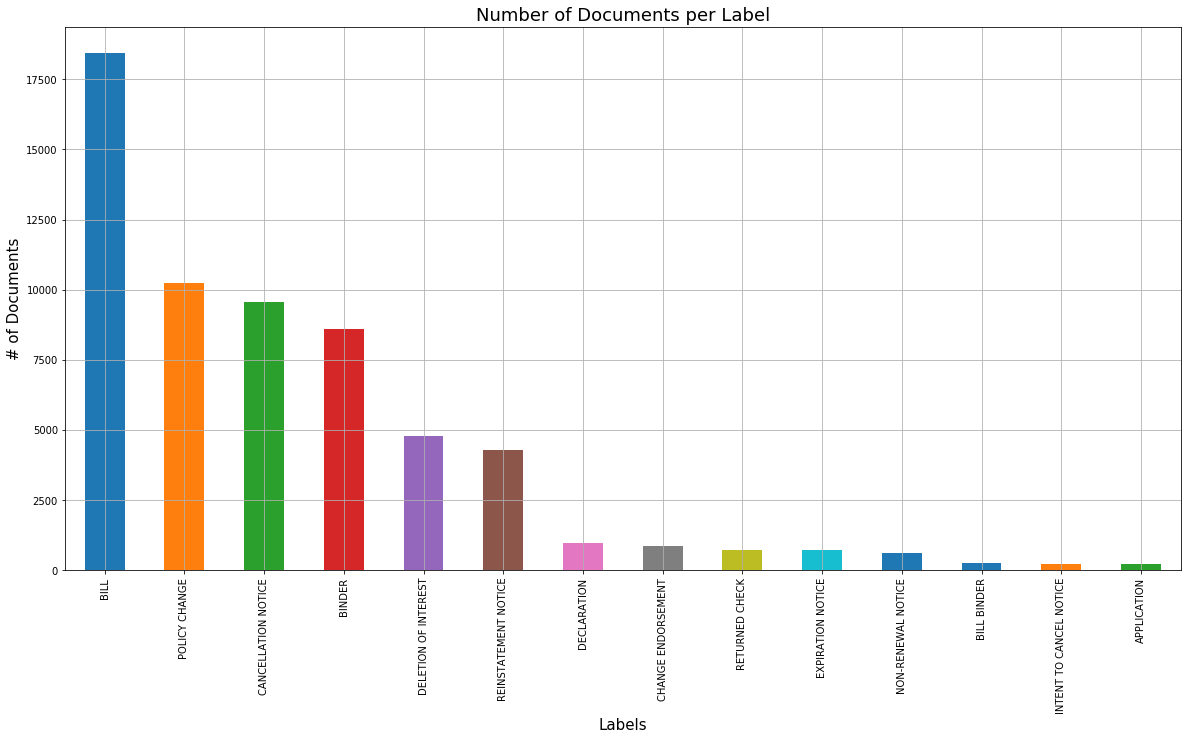

In [50]:
#plot

df_count.plot(x='Label', y='Number_of_Documents', kind='bar', legend=False, grid=True, figsize=(20,10))
plt.title("Number of Documents per Label", fontsize=18)
plt.ylabel('# of Documents', fontsize=15)
plt.xlabel('Labels', fontsize=15)

0    6044
1    5238
2    2404
3    4380
4    7097
Name: Text, dtype: int64
Minimum number of Characters in a Document is: 12
Maximum number of Characters in a Document is: 117987
Mean number of Characters in a Document is: 4347.387912523537


Text(0.5,0,'Characters')

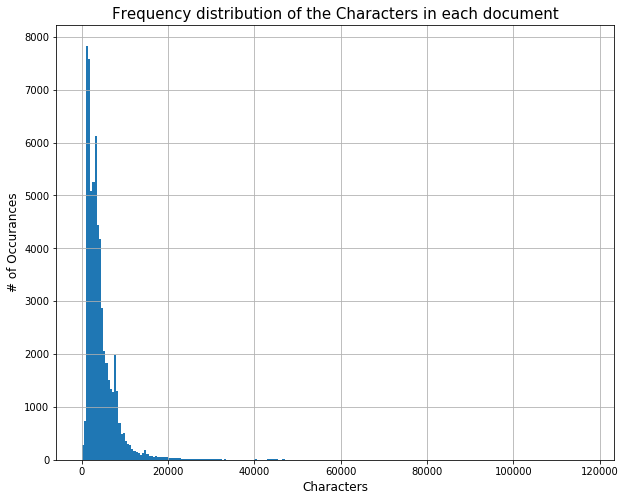

In [51]:
#-----------Number of Characters in each document--------------

char=df.Text.str.len()
print(char.head())
print('Minimum number of Characters in a Document is:', char.min())
print('Maximum number of Characters in a Document is:', char.max())
print('Mean number of Characters in a Document is:', char.mean())

#histogram
char.hist(bins=np.arange(char.min(),char.max(),500), figsize=(10,8))
plt.title("Frequency distribution of the Characters in each document", fontsize=15)
plt.ylabel('# of Occurances', fontsize=12)
plt.xlabel('Characters', fontsize=12)


0    465
1    403
2    185
3    337
4    546
Name: Text, dtype: int64
Minimum Length of Documents is: 1
Maximum Length of Documents is: 9076
Mean Length of Documents is: 334.49137788642594


Text(0.5,0,'Words')

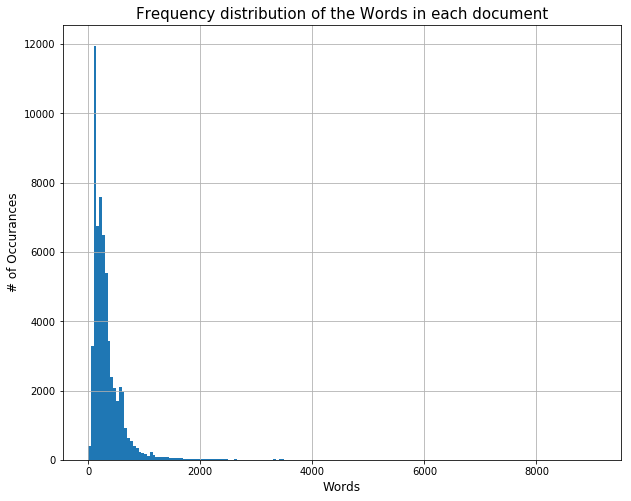

In [52]:
#--------Number of Words in the each document---------

words=df.Text.str.split().str.len()

print(words.head())
print('Minimum Length of Documents is:', words.min())
print('Maximum Length of Documents is:', words.max())
print('Mean Length of Documents is:', words.mean())

#histogram
words.hist(bins=np.arange(words.min(),words.max(),50), figsize=(10,8))
plt.title("Frequency distribution of the Words in each document", fontsize=15)
plt.ylabel('# of Occurances', fontsize=12)
plt.xlabel('Words', fontsize=12)

------------------------------------------------- Train and Test sets------------------------------------------------------

In [53]:
classNames=df.Label.unique() #storing unique classes into a numpy array 

train, test= train_test_split(df, random_state=42, test_size=0.20, shuffle=True)

print(train.shape)
print(test.shape)

x_train=train['Text']
y_train=train['Label']

x_test=test['Text']
y_test=test['Label']

encoder=preprocessing.LabelEncoder() # Inorder to encode/factorize the Labels
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

(48433, 2)
(12109, 2)


-----------------------------------------How is the Train and Test data distributed ?-------------------------------------------

,Label,Number_of_Documents
0,BILL,14690
1,POLICY CHANGE,8201
2,CANCELLATION NOTICE,7679
3,BINDER,6837
4,DELETION OF INTEREST,3866
5,REINSTATEMENT NOTICE,3421
6,DECLARATION,769
7,CHANGE ENDORSEMENT,703
8,RETURNED CHECK,597
9,EXPIRATION NOTICE,581


Text(0.5,0,'Labels')

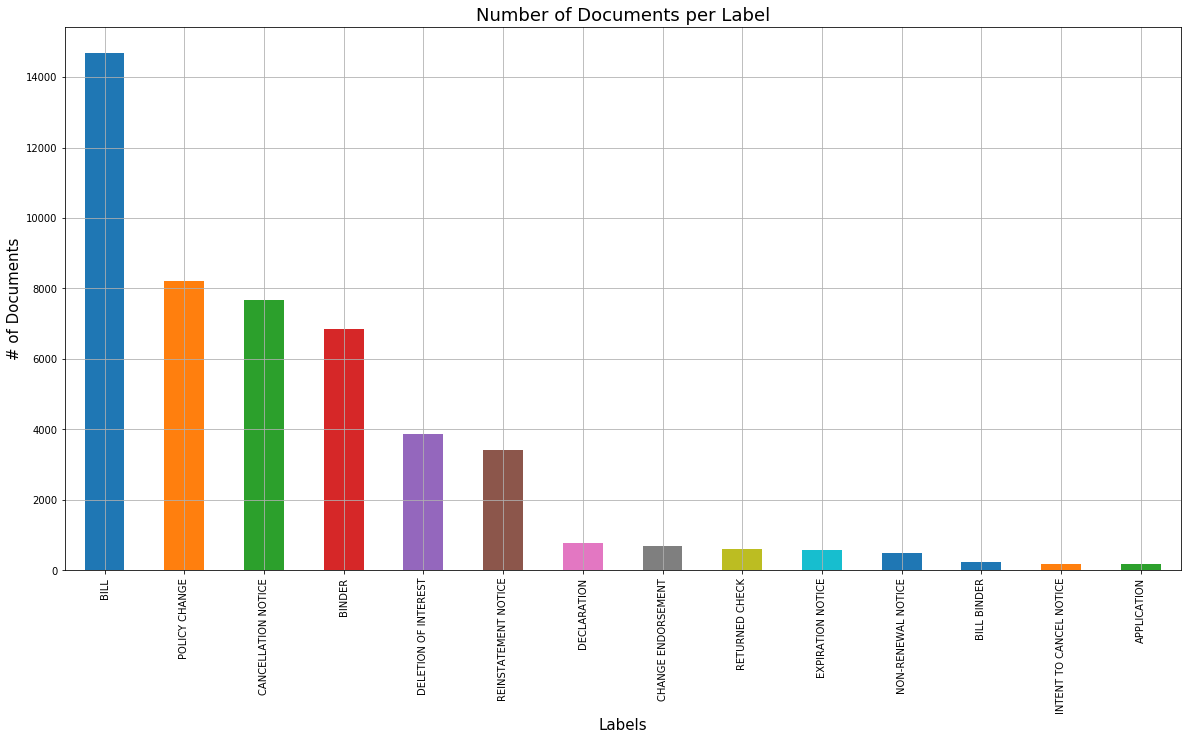

In [54]:
#----------Distribution of Train set------------

df_train=train['Label'].value_counts().reset_index().rename(columns={'index':'Label', 'Label':'Number_of_Documents'})
display(df_train)

# plot

df_train.plot(x='Label', y='Number_of_Documents', kind='bar', legend=False, grid=True, figsize=(20,10))
plt.title("Number of Documents per Label", fontsize=18)
plt.ylabel('# of Documents', fontsize=15)
plt.xlabel('Labels', fontsize=15)

,Label,Number_of_Documents
0,BILL,3759
1,POLICY CHANGE,2028
2,CANCELLATION NOTICE,1892
3,BINDER,1753
4,DELETION OF INTEREST,913
5,REINSTATEMENT NOTICE,874
6,DECLARATION,197
7,CHANGE ENDORSEMENT,163
8,EXPIRATION NOTICE,138
9,RETURNED CHECK,133


Text(0.5,0,'Labels')

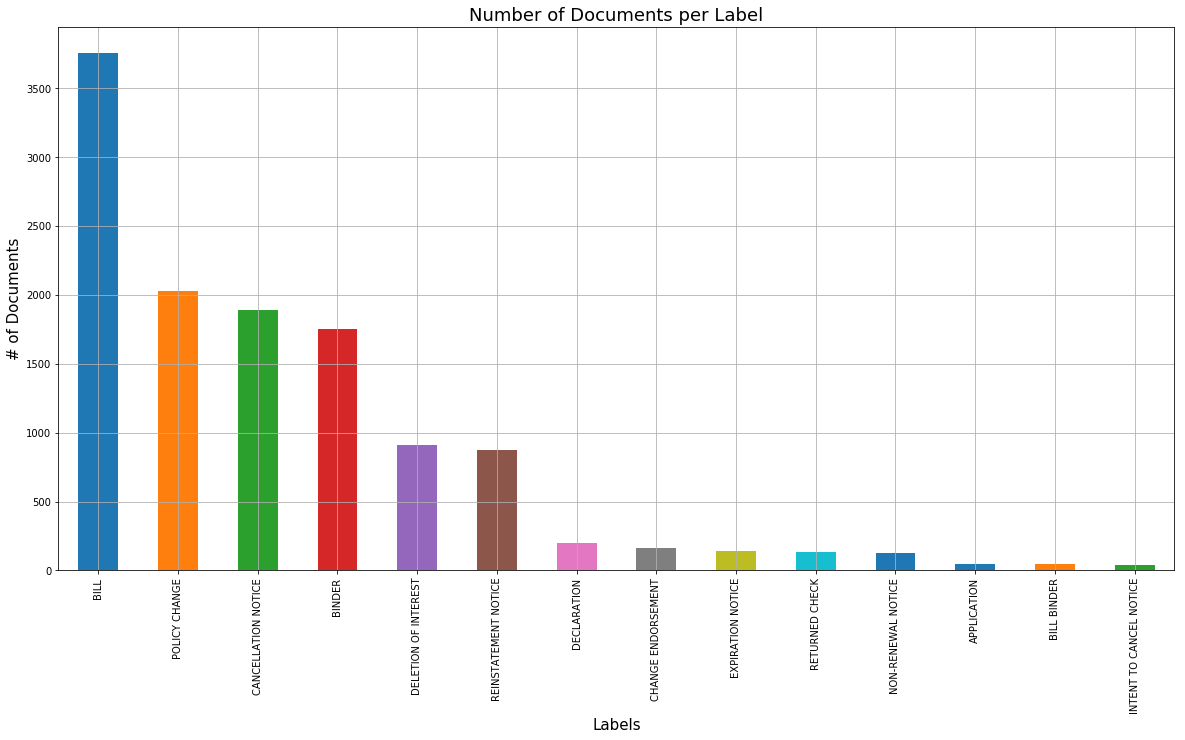

In [55]:
#----------Distribution of Test set-----------

df_test=test['Label'].value_counts().reset_index().rename(columns={'index':'Label', 'Label':'Number_of_Documents'})
display(df_test)

# plot

df_test.plot(x='Label', y='Number_of_Documents', kind='bar', legend=False, grid=True, figsize=(20,10))
plt.title("Number of Documents per Label", fontsize=18)
plt.ylabel('# of Documents', fontsize=15)
plt.xlabel('Labels', fontsize=15)

-----------------------------------------------Building the Model---------------------------------------------------------------

In [56]:
# Using Count Vectors for Feature Engineering
vect=CountVectorizer()

vect.fit(x_test)
vect.fit(x_train)

xtrain_count_vectors=vect.transform(x_train)
xtest_count_vectors=vect.transform(x_test)


In [57]:
# Using a Ngram level(bigrams and trigrams) TF IDF Vectors for Feature Engineering

vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2,3), max_features=5000)

vectorizer.fit(x_train)
vectorizer.fit(x_test)

xtrain_tfidf_ngram =  vectorizer.transform(x_train)
xtest_tfidf_ngram =  vectorizer.transform(x_test)

In [58]:
# Defining a function to train and predict for various models.

def model(classifier, train_set_X, train_set_Y, test_set_X):
    classifier.fit(train_set_X, train_set_Y) # fit the training dataset on the classifier 
    prediction = classifier.predict(test_set_X) # predict the labels on validation dataset

    return prediction

In [59]:
# Defining a function to be used to plot the confusion matrix.

def map_confusion_matrix(cm): 
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 10))

    #Generating the Heat Map using Seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap="pink", ax=ax,linewidths=0.5 )

    ax.set_title('Confusion Matrix', fontsize=15)
    plt.ylabel('True Labels', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=90)
    plt.yticks(tick_marks, classNames, rotation=0)
    plt.show()

    return

-----------------------------------------------------Naive Bayes----------------------------------------------------------------

In [60]:
#-----------------------------------------Naive Bayes on Ngram Level TF IDF Vectors----------------------------------------

y_pred = model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("NB, N-Gram Vectors, Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


NB, N-Gram Vectors, Accuracy:  0.7353208357420101
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        47
          1       0.81      0.86      0.83      3759
          2       0.00      0.00      0.00        46
          3       0.70      0.85      0.77      1753
          4       0.60      0.80      0.69      1892
          5       0.58      0.71      0.64       163
          6       0.41      0.04      0.07       197
          7       0.92      0.69      0.79       913
          8       0.44      0.35      0.39       138
          9       0.00      0.00      0.00        43
         10       0.87      0.11      0.19       123
         11       0.75      0.58      0.65      2028
         12       0.77      0.71      0.74       874
         13       0.90      0.52      0.66       133

avg / total       0.73      0.74      0.72     12109



C:\Users\ShReddy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[   0   12    0   26    3    0    1    0    0    0    0    5    0    0]
 [   0 3221    0  137  229    0    2    3   28    0    0  132    4    3]
 [   0   18    0   25    1    0    0    0    0    0    0    2    0    0]
 [   0   91    0 1498   41    1    0    2    1    0    0  114    5    0]
 [   0  163    0   18 1511    0    1   26    9    0    0   46  116    2]
 [   0    5    0    7    9  116    0    0    0    0    0   22    4    0]
 [   0   34    0   90   20    1    7    8    4    0    0   32    0    1]
 [   0    9    0    1  245    0    1  630    0    0    0    7   20    0]
 [   0   43    0    2   35    0    0    0   48    0    2    5    3    0]
 [   0   23    0    1   18    0    0    0    0    0    0    1    0    0]
 [   0    1    0    1   89    0    0    0    2    0   13    6   11    0]
 [   0  279    0  322  121   83    4   12    9    0    0 1174   22    2]
 [   0   42    0    6  173    0    1    6    7    0    0   22  617    0]
 [   0   39    0   11    9    0    0    0    0    0

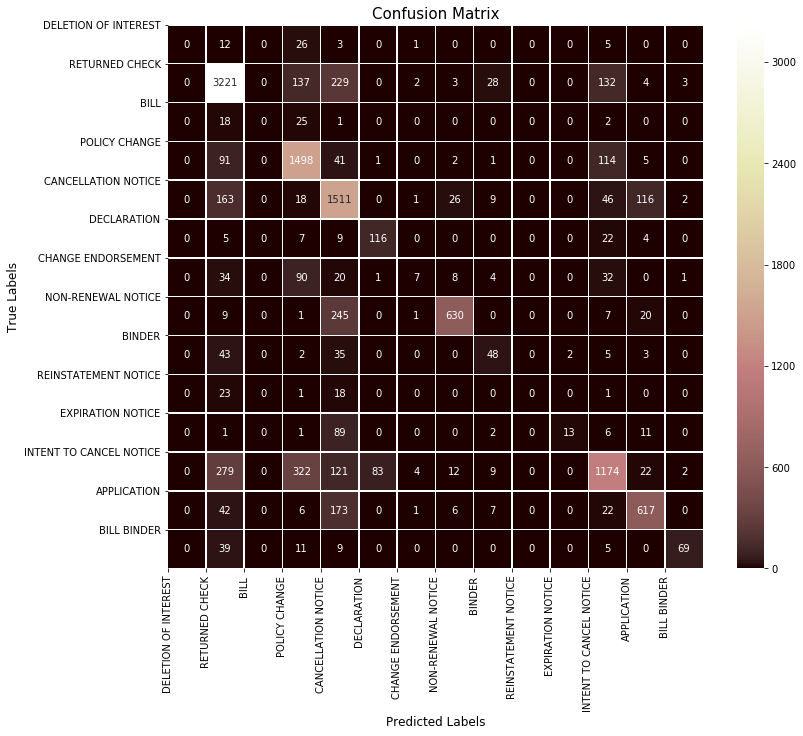

In [61]:
# Confusion Matrix for Naive Bayes on Ngram Level TF IDF Vectors
cm=confusion_matrix(y_test, y_pred)
print(cm)

#plot
con_matrix= map_confusion_matrix(cm)

In [62]:
# ----------------------------------------Naive Bayes on Count Vectors-------------------------------------------------------

y_pred = model(naive_bayes.MultinomialNB(), xtrain_count_vectors, y_train, xtest_count_vectors)
print("NB, N-Gram Vectors, Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

NB, N-Gram Vectors, Accuracy:  0.7150879511107441
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        47
          1       0.73      0.92      0.82      3759
          2       0.00      0.00      0.00        46
          3       0.72      0.89      0.80      1753
          4       0.56      0.76      0.65      1892
          5       0.80      0.39      0.53       163
          6       0.00      0.00      0.00       197
          7       0.96      0.63      0.76       913
          8       0.00      0.00      0.00       138
          9       0.00      0.00      0.00        43
         10       0.00      0.00      0.00       123
         11       0.78      0.67      0.72      2028
         12       0.99      0.18      0.30       874
         13       0.97      0.26      0.40       133

avg / total       0.71      0.72      0.68     12109



C:\Users\ShReddy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[   0    5    0   27    0    0    0    0    0    0    0   15    0    0]
 [   0 3477    0  130   61    0    0    0    0    0    0   91    0    0]
 [   0   18    0   17    0    0    0    0    0    0    0   11    0    0]
 [   0   82    0 1568   12    0    0    0    0    0    0   91    0    0]
 [   0  389    0   23 1437    0    0   13    0    0    0   29    1    0]
 [   0   14    0    5    5   64    0    0    0    0    0   75    0    0]
 [   0   42    0  107    9    0    0    6    0    0    0   32    0    1]
 [   0   20    0    3  309    0    0  573    0    0    0    8    0    0]
 [   0  105    0    1   28    0    0    0    0    0    0    4    0    0]
 [   0   24    0    2   17    0    0    0    0    0    0    0    0    0]
 [   0   25    0    1   93    0    0    0    0    0    0    4    0    0]
 [   0  331    0  285   43   16    0    3    0    0    0 1350    0    0]
 [   0  151    0    8  535    0    0    2    0    0    0   22  156    0]
 [   0   77    0   14    1    0    0    0    0    0

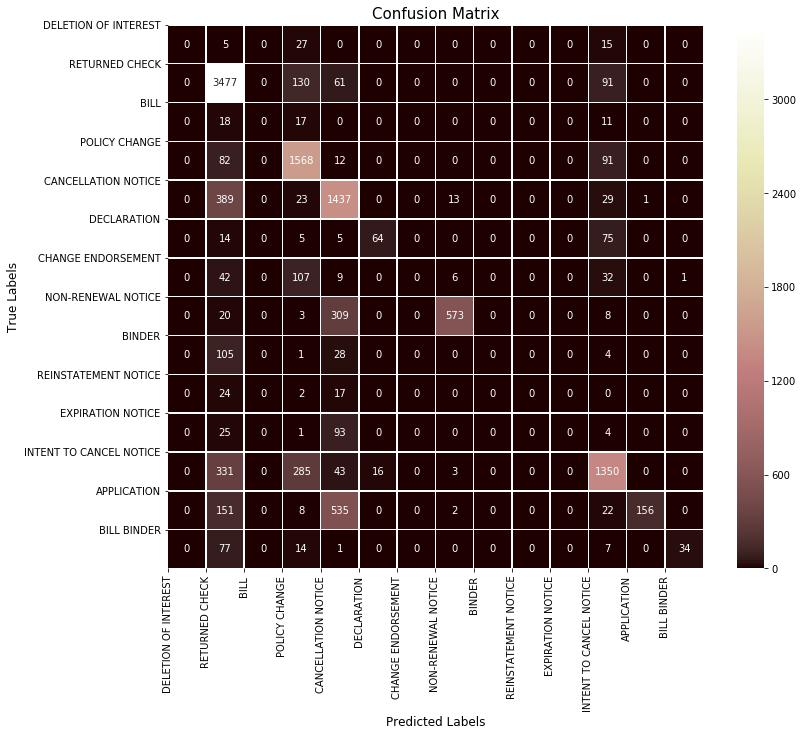

In [63]:
# Confusion Matrix for Naive Bayes on Count Vectors
cm=confusion_matrix(y_test, y_pred)
print(cm)

#plot
con_matrix= map_confusion_matrix(cm)

---------------------------------------------------------SVM--------------------------------------------------------------------

In [64]:
#---------------------------------------------SVM on Ngram Level TF IDF Vectors-------------------------------------------------

y_pred = model(LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("SVM, N-Gram Vectors, Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM, N-Gram Vectors, Accuracy:  0.8250061937401932
             precision    recall  f1-score   support

          0       0.91      0.21      0.34        47
          1       0.88      0.89      0.88      3759
          2       0.42      0.11      0.17        46
          3       0.80      0.84      0.82      1753
          4       0.78      0.83      0.81      1892
          5       0.82      0.77      0.79       163
          6       0.50      0.10      0.16       197
          7       0.88      0.86      0.87       913
          8       0.82      0.64      0.72       138
          9       0.62      0.35      0.45        43
         10       0.81      0.69      0.75       123
         11       0.75      0.81      0.78      2028
         12       0.88      0.84      0.86       874
         13       0.87      0.77      0.82       133

avg / total       0.82      0.83      0.82     12109



[[  10    9    0   20    0    0    0    0    0    0    0    7    1    0]
 [   0 3335    6   69  160    1    6    5    5    2    0  158   10    2]
 [   0   21    5    5    0    0    0    0    0    0    0   15    0    0]
 [   1   62    0 1469   19    4    1    5    0    0    1  185    4    2]
 [   0  135    0   14 1574    1    6   57    5    4   10   41   44    1]
 [   0    1    0    1    3  126    0    1    0    0    0   26    5    0]
 [   0   31    0   82   12    0   19    8    2    0    1   41    0    1]
 [   0    3    0    3   97    0    0  784    0    0    0   17    6    3]
 [   0   27    0    2    9    0    0    1   88    1    3    5    2    0]
 [   0    9    0    1   12    0    0    2    0   15    0    0    3    1]
 [   0    2    0    3   24    0    0    0    2    1   85    3    3    0]
 [   0  120    1  164   23   22    5   14    4    1    4 1647   19    4]
 [   0   15    0    5   74    0    1   12    1    0    1   33  731    1]
 [   0   11    0    7    1    0    0    0    0    0

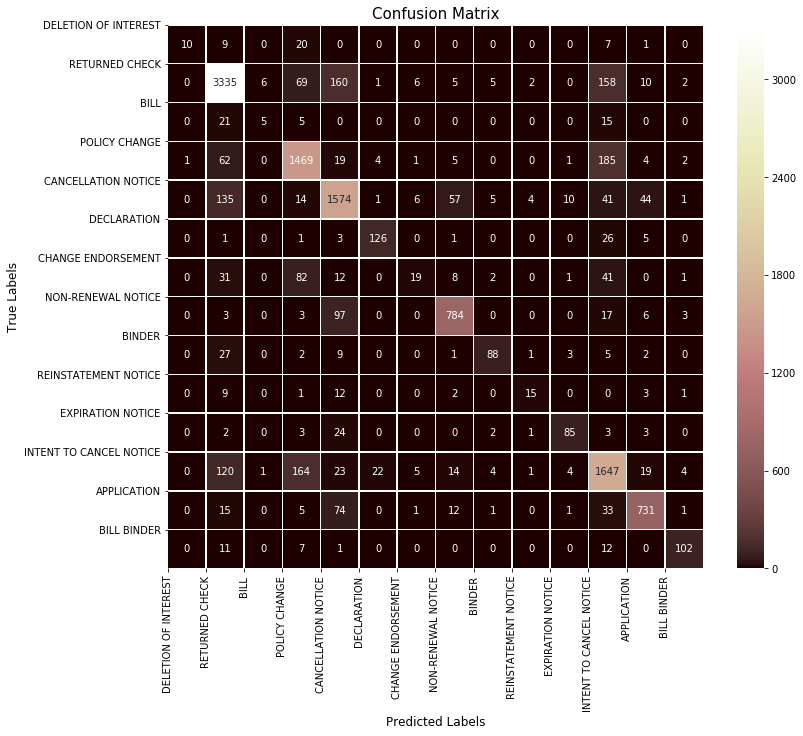

In [65]:
# Confusion Matrix for SVM on Ngram Level TF IDF Vectors

cm=confusion_matrix(y_test, y_pred)
print(cm)

#plot
con_matrix= map_confusion_matrix(cm)

In [66]:
# -----------------------------------------------SVM on Count Vectors-----------------------------------------------------------

y_pred = model(LinearSVC(), xtrain_count_vectors, y_train, xtest_count_vectors)
print("SVM, N-Gram Vectors, Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM, N-Gram Vectors, Accuracy:  0.8479643240564869
             precision    recall  f1-score   support

          0       0.81      0.45      0.58        47
          1       0.89      0.88      0.89      3759
          2       0.17      0.17      0.17        46
          3       0.84      0.84      0.84      1753
          4       0.83      0.87      0.85      1892
          5       0.75      0.80      0.78       163
          6       0.27      0.22      0.24       197
          7       0.91      0.90      0.90       913
          8       0.82      0.78      0.80       138
          9       0.73      0.63      0.68        43
         10       0.85      0.85      0.85       123
         11       0.79      0.81      0.80      2028
         12       0.93      0.94      0.94       874
         13       0.97      0.86      0.91       133

avg / total       0.85      0.85      0.85     12109



[[  21    7    0   10    0    0    1    0    0    0    0    8    0    0]
 [   0 3316   26   58  170    3   26    2   15    5    1  125   12    0]
 [   0   23    8    6    0    0    0    0    0    0    0    8    0    1]
 [   4   56    4 1478    7    3   39    3    1    0    0  155    3    0]
 [   0  132    2    7 1637    0    5   53    0    4    5   26   20    1]
 [   0    2    0    0    3  131    1    0    0    0    0   25    1    0]
 [   1   27    1   61   10    1   43    6    1    0    1   43    1    1]
 [   0    4    0    4   69    0    7  824    0    0    0    4    1    0]
 [   0   17    0    0    2    0    1    1  107    0    5    4    1    0]
 [   0    3    0    1    6    0    0    1    0   27    1    1    3    0]
 [   0    1    0    0   10    0    0    2    1    0  105    4    0    0]
 [   0  115    7  133   25   36   33   16    4    1    5 1638   14    1]
 [   0    7    0    2   23    0    3    2    2    0    0   16  819    0]
 [   0    5    0    1    2    0    1    0    0    0

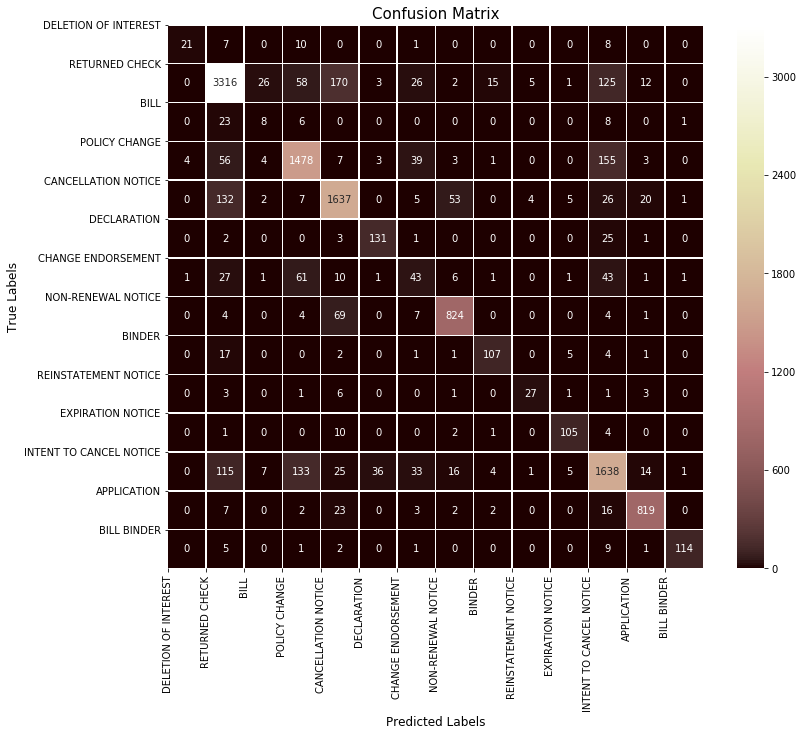

In [67]:
# Confusion Matrix for SVM on Count Vectors

cm=confusion_matrix(y_test, y_pred)
print(cm)

#plot
con_matrix= map_confusion_matrix(cm)

----------------------------------------------------SGD--------------------------------------------------------------------------

In [68]:
#---------------------------------------- SGD Classifier on Ngram Level TF IDF Vectors------------------------------------------

y_pred=model(linear_model.SGDClassifier() , xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("SGD, N-Gram Vectors, Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\ShReddy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGD, N-Gram Vectors, Accuracy:  0.8114625485176316
             precision    recall  f1-score   support

          0       0.67      0.04      0.08        47
          1       0.86      0.90      0.88      3759
          2       0.00      0.00      0.00        46
          3       0.78      0.83      0.80      1753
          4       0.75      0.82      0.79      1892
          5       0.85      0.74      0.79       163
          6       0.71      0.03      0.05       197
          7       0.89      0.82      0.86       913
          8       0.81      0.55      0.66       138
          9       0.58      0.26      0.35        43
         10       0.79      0.63      0.70       123
         11       0.75      0.80      0.77      2028
         12       0.87      0.78      0.82       874
         13       0.84      0.74      0.78       133

avg / total       0.81      0.81      0.80     12109



[[   2   14    0   20    0    0    0    0    0    0    0   11    0    0]
 [   0 3373    1   80  151    0    1    4    2    1    0  139    5    2]
 [   0   21    0    9    0    0    0    0    0    0    0   16    0    0]
 [   0   72    0 1457   15    1    1    3    0    0    1  195    5    3]
 [   0  152    0   18 1554    1    0   55    2    3    8   47   51    1]
 [   0    2    0    5    5  121    0    0    0    0    0   26    4    0]
 [   0   33    0   99    7    0    5    8    2    0    1   40    1    1]
 [   0    4    0    4  127    0    0  751    0    0    1   18    4    4]
 [   0   37    0    4    7    0    0    1   76    2    3    7    1    0]
 [   0   14    0    2   10    0    0    2    0   11    0    0    3    1]
 [   0    1    0    1   29    0    0    1    1    0   77    5    8    0]
 [   1  153    0  157   37   20    0    9    5    0    3 1620   17    6]
 [   0   20    0    6  116    0    0    8    6    2    3   31  681    1]
 [   0   15    0    6    2    0    0    0    0    0

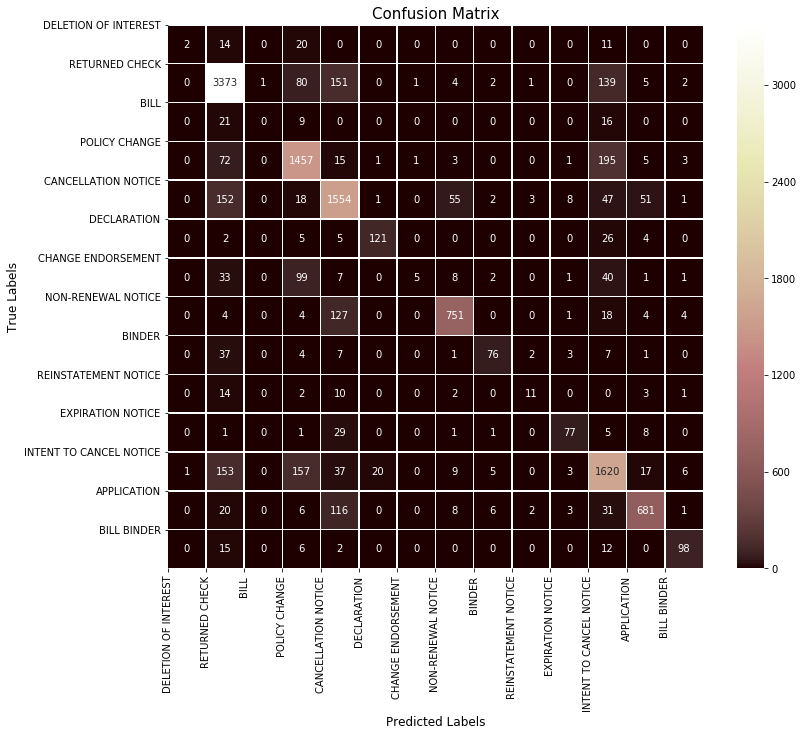

In [69]:
# Confusion Matrix for SGD on Ngram Level TF IDF Vectors
cm=confusion_matrix(y_test, y_pred)
print(cm)

#plot
con_matrix= map_confusion_matrix(cm)

In [70]:
#----------------------------------------------SGD on Count Vectors-------------------------------------------------------------

y_pred=model(linear_model.SGDClassifier() , xtrain_count_vectors, y_train, xtest_count_vectors)
print("SGD, N-Gram Vectors, Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\ShReddy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGD, N-Gram Vectors, Accuracy:  0.8321083491617804
             precision    recall  f1-score   support

          0       0.72      0.49      0.58        47
          1       0.88      0.91      0.89      3759
          2       0.16      0.22      0.18        46
          3       0.78      0.89      0.83      1753
          4       0.89      0.74      0.81      1892
          5       0.69      0.85      0.76       163
          6       0.21      0.20      0.21       197
          7       0.86      0.92      0.89       913
          8       0.89      0.64      0.74       138
          9       0.31      0.58      0.41        43
         10       0.77      0.86      0.82       123
         11       0.85      0.74      0.79      2028
         12       0.84      0.95      0.89       874
         13       0.98      0.77      0.86       133

avg / total       0.84      0.83      0.83     12109



[[  23    6    0   15    0    0    0    0    0    0    0    3    0    0]
 [   0 3414   29   94   93    2   27    2    5   12    1   64   16    0]
 [   0   25   10    6    0    0    0    0    0    0    0    5    0    0]
 [   5   38    4 1562    3    4   18    2    0    0    1  109    7    0]
 [   0  195    0   17 1401   10   47   95    0   31   12   21   62    1]
 [   0    0    0    5    0  138    2    1    0    0    0   15    2    0]
 [   1   24    0   90    6    0   40    8    0    0    1   24    2    1]
 [   0    2    0    4   45    3    4  844    0    1    0    5    5    0]
 [   0   30    0    3    2    1    2    1   88    1    3    0    7    0]
 [   0    4    0    1    1    0    1    1    0   25    1    2    7    0]
 [   0    2    0    2    3    0    1    2    1    1  106    3    2    0]
 [   3  130   20  193   12   41   44   16    5    7   10 1497   50    0]
 [   0   11    0    4   13    0    0    5    0    2    2   11  826    0]
 [   0   10    1    6    0    1    3    0    0    0

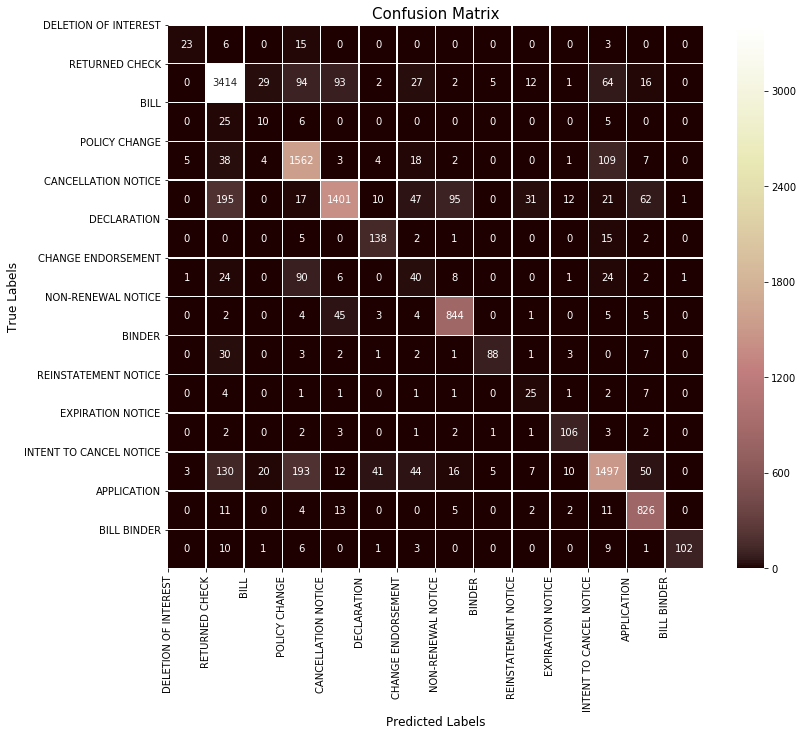

In [71]:
# Confusion Matrix for SGD on Count Vectors 
cm=confusion_matrix(y_test, y_pred)
print(cm)

#plot
con_matrix= map_confusion_matrix(cm)

-------------------------------------------------------Logistic Classifier-------------------------------------------------------

In [72]:
#--------------------------------------Logistic Classifier on Ngram Level TF IDF Vectors--------------------------------------- 

y_pred=model(linear_model.LogisticRegression() , xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("Logistic, N-Gram Vectors, Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic, N-Gram Vectors, Accuracy:  0.8146832934181187
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        47
          1       0.86      0.90      0.88      3759
          2       0.00      0.00      0.00        46
          3       0.79      0.83      0.81      1753
          4       0.74      0.84      0.79      1892
          5       0.88      0.74      0.80       163
          6       1.00      0.05      0.10       197
          7       0.90      0.84      0.87       913
          8       0.87      0.49      0.63       138
          9       1.00      0.12      0.21        43
         10       0.84      0.46      0.60       123
         11       0.74      0.82      0.78      2028
         12       0.91      0.78      0.84       874
         13       0.92      0.63      0.75       133

avg / total       0.82      0.81      0.80     12109



C:\Users\ShReddy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[   0   14    0   19    1    0    0    0    0    0    0   13    0    0]
 [   0 3370    0   76  154    0    0    4    3    0    0  146    6    0]
 [   0   23    0    6    0    0    0    0    0    0    0   17    0    0]
 [   0   67    0 1457   24    1    0    1    0    0    0  198    3    2]
 [   0  148    0   16 1598    0    0   46    0    0    6   49   28    1]
 [   0    0    0    3    6  120    0    0    0    0    0   31    3    0]
 [   0   33    0   96   10    0   10    8    0    0    1   38    0    1]
 [   0    6    0    2  122    0    0  763    0    0    0   14    5    1]
 [   0   41    0    2   13    0    0    1   68    0    2    9    2    0]
 [   0   18    0    2   14    0    0    1    0    5    0    0    2    1]
 [   0    2    0    1   51    0    0    1    1    0   57    6    4    0]
 [   0  136    0  152   38   15    0   12    2    0    2 1655   15    1]
 [   0   24    0    6  117    0    0   12    4    0    0   33  678    0]
 [   0   20    0   10    2    0    0    0    0    0

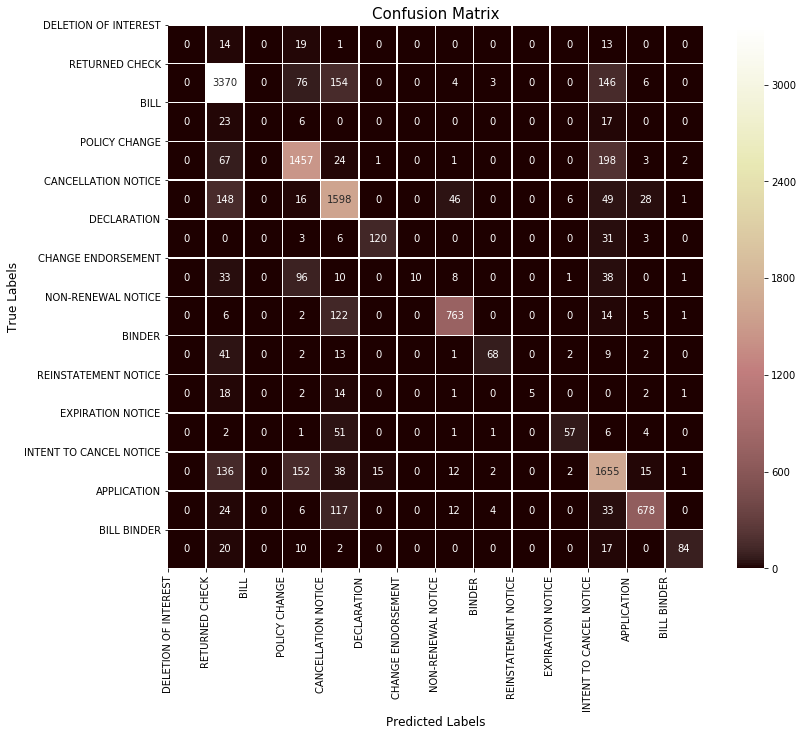

In [73]:
# Confusion Matrix for Logistic on Ngram Level TF IDF Vectors 
cm=confusion_matrix(y_test, y_pred)
print(cm)

#plot
con_matrix= map_confusion_matrix(cm)

In [74]:
#-------------------------------------------Logistic on Count Vectors-----------------------------------------------------------
 
y_pred=model(linear_model.LogisticRegression() , xtrain_count_vectors, y_train, xtest_count_vectors)
print("Logistic, N-Gram Vectors, Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic, N-Gram Vectors, Accuracy:  0.8656371294078784
             precision    recall  f1-score   support

          0       0.80      0.51      0.62        47
          1       0.91      0.90      0.90      3759
          2       0.19      0.13      0.15        46
          3       0.86      0.87      0.86      1753
          4       0.85      0.88      0.86      1892
          5       0.79      0.82      0.80       163
          6       0.54      0.21      0.31       197
          7       0.92      0.91      0.91       913
          8       0.83      0.73      0.78       138
          9       0.77      0.63      0.69        43
         10       0.84      0.87      0.86       123
         11       0.79      0.85      0.82      2028
         12       0.94      0.94      0.94       874
         13       0.98      0.87      0.92       133

avg / total       0.86      0.87      0.86     12109



[[  24    4    0   11    0    0    0    0    0    0    0    8    0    0]
 [   1 3373   20   37  162    0    8    2   11    3    1  132    9    0]
 [   0   22    6    6    0    0    1    0    0    0    0   11    0    0]
 [   3   45    1 1519    7    2   15    1    0    0    2  154    4    0]
 [   0  117    0    5 1658    0    2   48    0    5    5   31   20    1]
 [   0    1    0    1    4  133    0    0    0    0    0   23    1    0]
 [   2   26    0   67    9    0   42    6    1    0    1   41    1    1]
 [   0    4    0    4   66    0    0  830    0    0    0    8    1    0]
 [   0   20    0    1    2    0    2    1  101    0    4    6    1    0]
 [   0    2    0    1    8    0    0    0    0   27    1    2    2    0]
 [   0    1    0    1    7    0    0    1    1    0  107    5    0    0]
 [   0  102    5  106   16   33    7   13    7    0    5 1722   12    0]
 [   0    5    0    2   19    0    1    2    0    0    1   20  824    0]
 [   0    3    0    2    2    0    0    0    0    0

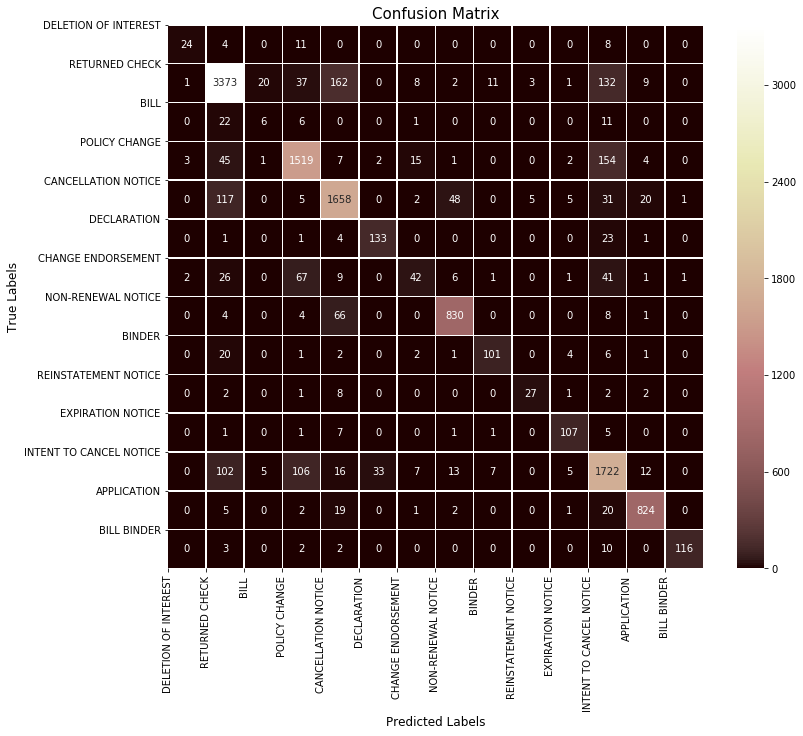

In [75]:
# Confusion Matrix for Logistic on Count Vectors
cm=confusion_matrix(y_test, y_pred)
print(cm)

#plot
con_matrix= map_confusion_matrix(cm)

------------------------------------------------------Summary-------------------------------------------------------------------

Logistic Regression Classifier with Count Vectors has demonstrated to have the highest Accuracy and F-1 Score. 